In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

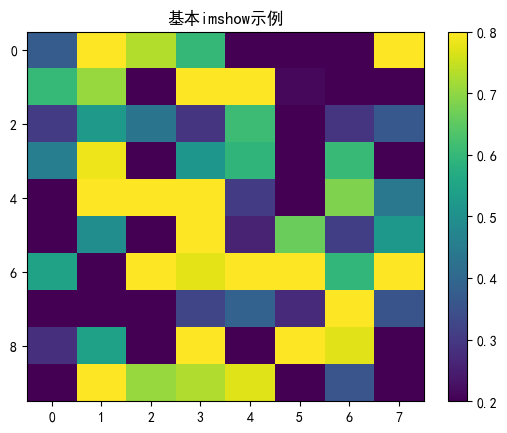

In [3]:
# 创建一个10x10的随机数组
np.random.seed(42)
data = np.random.rand(10, 8)

# 使用imshow显示
plt.imshow(
            data,            # 要显示的二维数据数组
            cmap='viridis',  # 颜色映射方案
            aspect='auto',   # 图像宽高比模式
            vmin=0.2,        # 颜色映射的最小值
            vmax=0.8         # 颜色映射的最大值
          )

# 添加颜色条
plt.colorbar()  
plt.title("基本imshow示例")
plt.show()

# 2、使用示例：

### 示例 1：显示图像

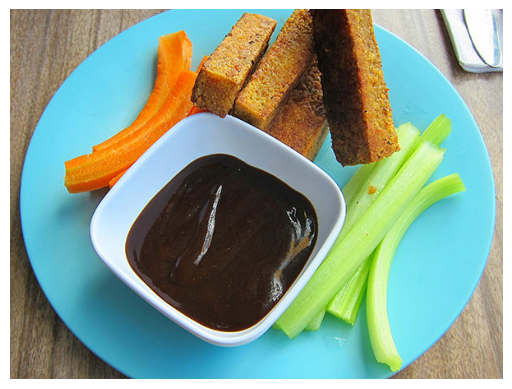

In [4]:
from PIL import Image
import matplotlib.image as img

# 加载图像的两种常用方法

# 方法一：
# image = Image.open('example.jpg')
# image = np.array(image)

# 方法二：
image = img.imread('example.jpg')

plt.imshow(image)
plt.axis('off')  # 隐藏坐标轴
plt.show()

### 示例 2：添加数值标注+坐标轴优化

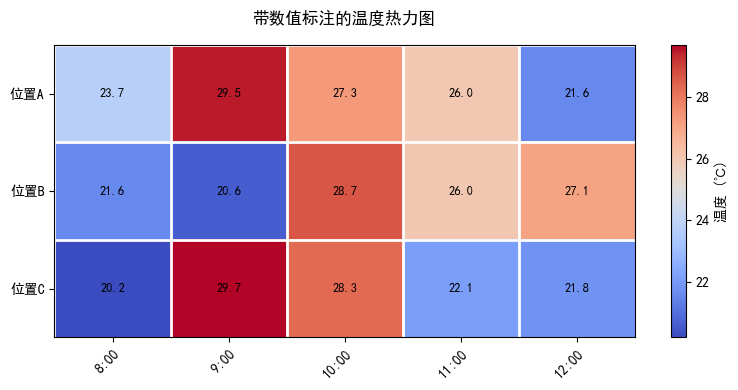

In [5]:
# 创建数据
np.random.seed(42)
temperatures = np.random.uniform(20, 30, size=(3, 5))
times = ['8:00','9:00','10:00','11:00','12:00']
positions = ['位置A','位置B','位置C']

fig, ax = plt.subplots(figsize=(8, 4))
im = ax.imshow(temperatures, cmap='coolwarm', aspect='auto')
fig.colorbar(im, ax=ax, label='温度 (℃)')

# 自定义刻度位置和标签
ax.set_xticks(np.arange(len(times)))
# 将x轴刻度标签替换为实际时间名称
ax.set_xticklabels(times)
ax.set_yticks(np.arange(len(positions)))
# 将y轴刻度标签替换为实际位置名称
ax.set_yticklabels(positions)
# 调整x轴标签显示方式：旋转45度，右对齐
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title('带数值标注的温度热力图', fontsize=12, pad=15)

# 在每个单元格中心添加数值标注
for i in range(len(positions)): 
    for j in range(len(times)):
        text = ax.text(j, i, f'{temperatures[i, j]:.1f}',
                       ha="center", va="center", color="black", fontsize=9)

# 添加网格线（通过刻度）
# 设置次要刻度位置：在主要刻度之间（-0.5位置），用于定位网格线
ax.set_xticks(np.arange(5)-0.5, minor=True)
ax.set_yticks(np.arange(3)-0.5, minor=True)
# 绘制次要刻度处的网格线
ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
# 隐藏次要刻度的刻度线（只保留网格线）
ax.tick_params(which="minor", size=0)

plt.tight_layout()
plt.show()

### 示例 3：根据返回的对象进一步调整图像属性

原图数据形状: (10, 10)
修改后的数据形状: (5, 5)


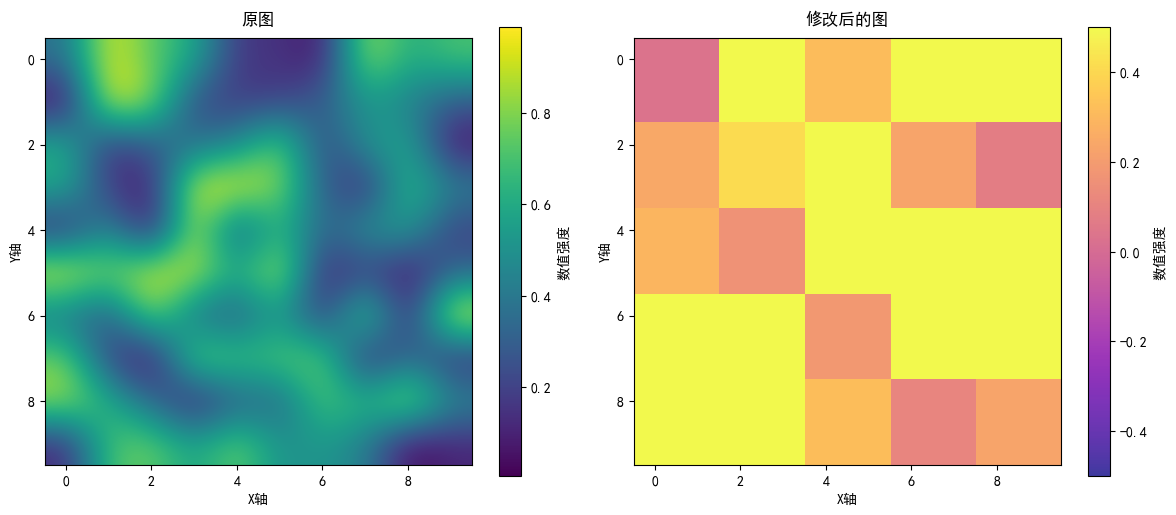

In [6]:
# 创建10x10的随机数组
np.random.seed(42)
data = np.random.rand(10, 10)

# 创建2个子图（1行2列）
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# --------------------------
# 绘制原图（第一个子图）
# --------------------------
im1 = ax1.imshow(data, cmap='viridis', interpolation='bicubic')
cbar1 = fig.colorbar(im1, ax=ax1)
cbar1.set_label('数值强度', fontsize=10)
ax1.set_title('原图', fontsize=12, pad=10)
ax1.set_xlabel('X轴', fontsize=10)
ax1.set_ylabel('Y轴', fontsize=10)

# --------------------------
# 绘制修改后的图（第二个子图）
# --------------------------
im2 = ax2.imshow(data, cmap='viridis', interpolation='bicubic')

# 1. 调整颜色映射和归一化参数
im2.set_cmap('plasma')  # 从viridis改为plasma
im2.set_clim(vmin=-0.5, vmax=0.5)  # 调整数值映射范围

# 2. 调整透明度
im2.set_alpha(0.8)  # 设置80%透明度

# 3. 调整插值方式
im2.set_interpolation('none') 

# 4. 动态更新显示的数据
new_data = np.random.rand(5, 5)
im2.set_data(new_data)  # 更新为5x5的新数据

# 添加颜色条
cbar2 = fig.colorbar(im2, ax=ax2)
cbar2.set_label('数值强度', fontsize=10)

# 设置标题和坐标轴
ax2.set_title('修改后的图', fontsize=12, pad=10)
ax2.set_xlabel('X轴', fontsize=10)
ax2.set_ylabel('Y轴', fontsize=10)

# 打印数据形状信息
print("原图数据形状:", im1.get_array().shape)
print("修改后的数据形状:", im2.get_array().shape)

plt.tight_layout()
plt.show()